# CPU_Usage_Analysis

This script performs the following tasks:

- Load Data: Reads a CSV file containing CPU usage data with timestamps.
- Standardize Columns: Cleans column names by removing extra spaces and renaming them to a consistent format.
- Format Timestamps: Converts the 'Timestamp' column to datetime objects for proper time-based analysis.
- Extract Hour: Adds an 'Hour' column to the dataframe, representing the hour of the day extracted from the timestamp.
- Group and Analyze: Groups the data by hour and calculates the average CPU usage for each hour.
- Find Peak Usage: Identifies the hour with the highest average CPU usage and its value.
- Plot Data: Optionally plots the average CPU usage by hour for visualization.

Peak Hour: 9
Peak Average CPU Usage: 11.888649425287356


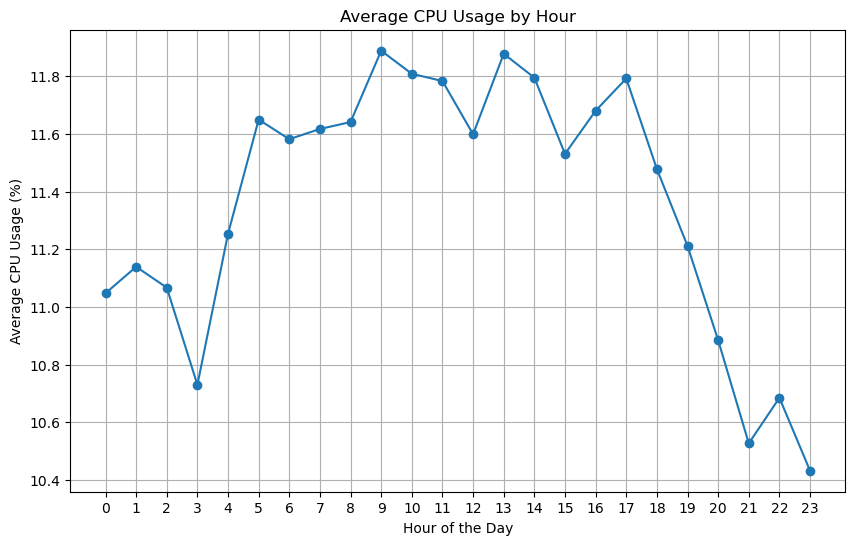

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
file_path = 'C:/Users/ratho/OneDrive/Desktop/Dataset with timestamp.csv'
df = pd.read_csv(file_path)

# Ensure your data has columns named 'CPU_Usage' and 'Timestamp'
# Rename columns to standardize names if necessary
df.columns = [col.strip() for col in df.columns]  # Remove any extra spaces from column names
df.rename(columns={'CPU_Usage': 'CPUUsage', 'Timestamp': 'Timestamp'}, inplace=True)

# Convert 'Timestamp' to datetime with the correct format
# Adjust the format to match '01-01-2023 00:00'
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

# Extract hour from timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Group by hour and calculate the mean CPU usage for each hour
hourly_usage = df.groupby('Hour')['CPUUsage'].mean()

# Find the peak hour with highest average CPU usage
peak_hour = hourly_usage.idxmax()
peak_usage = hourly_usage.max()

print(f'Peak Hour: {peak_hour}')
print(f'Peak Average CPU Usage: {peak_usage}')

# Optionally, you can plot the hourly CPU usage
plt.figure(figsize=(10, 6))
plt.plot(hourly_usage.index, hourly_usage.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average CPU Usage (%)')
plt.title('Average CPU Usage by Hour')
plt.xticks(range(24))  # Show each hour on x-axis
plt.grid(True)
plt.show()

The output includes:

Peak Hour: The hour of the day with the highest average CPU usage.
Peak Average CPU Usage: The average CPU usage percentage during that peak hour.